In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


epoch: 10, loss = 4019.6084
epoch: 20, loss = 2832.6216
epoch: 30, loss = 2023.7903
epoch: 40, loss = 1472.5177
epoch: 50, loss = 1096.7070
epoch: 60, loss = 840.4568
epoch: 70, loss = 665.6937
epoch: 80, loss = 546.4807
epoch: 90, loss = 465.1443
epoch: 100, loss = 409.6393


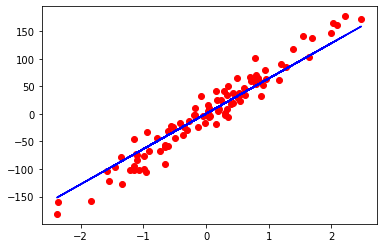

In [1]:
#linear regression
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [2]:
#logistic regression
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = Model(n_features)
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.6987
epoch: 20, loss = 0.5412
epoch: 30, loss = 0.4504
epoch: 40, loss = 0.3920
epoch: 50, loss = 0.3511
epoch: 60, loss = 0.3207
epoch: 70, loss = 0.2970
epoch: 80, loss = 0.2779
epoch: 90, loss = 0.2621
epoch: 100, loss = 0.2488
accuracy: 0.9035


In [4]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
#cnn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 5
batch_size = 4
learning_rate = 0.001
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=False)
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)    
        x = F.relu(self.fc1(x))       
        x = F.relu(self.fc2(x))     
        x = self.fc3(x)            
        return x
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        value, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/5], Step [2000/12500], Loss: 2.2843
Epoch [1/5], Step [4000/12500], Loss: 2.3034
Epoch [1/5], Step [6000/12500], Loss: 2.3024
Epoch [1/5], Step [8000/12500], Loss: 2.2720
Epoch [1/5], Step [10000/12500], Loss: 2.2995
Epoch [1/5], Step [12000/12500], Loss: 2.4794
Epoch [2/5], Step [2000/12500], Loss: 2.1262
Epoch [2/5], Step [4000/12500], Loss: 2.1797
Epoch [2/5], Step [6000/12500], Loss: 2.5740
Epoch [2/5], Step [8000/12500], Loss: 1.4910
Epoch [2/5], Step [10000/12500], Loss: 1.7833
Epoch [2/5], Step [12000/12500], Loss: 1.3443
Epoch [3/5], Step [2000/12500], Loss: 1.2591
Epoch [3/5], Step [4000/12500], Loss: 2.1910
Epoch [3/5], Step [6000/12500], Loss: 1.4156
Epoch [3/5], Step [8000/12500], Loss: 2.0752
Epoch [3/5], Step [10000/12500], Loss: 2.1616
Epoch [3/5], Step [12000/12500], Loss: 2.1834
Epoch [4/5], Step [2000/12500], Loss: 1.1841
Epoch [4/5], Step [4000/12500], Loss: 1.2549
Epoch [4/5], Step 